In [46]:
import time
import cv2
import pyautogui
import numpy as np
# from PIL import ImageGrab
import pyscreenshot as ImageGrab
import matplotlib.pyplot as plt


In [8]:
def get_bb():
    # sourcery skip: inline-immediately-returned-variable, remove-unreachable-code
    # Create a window to display the screen capture
    # cv2.namedWindow("Screen Capture", cv2.WINDOW_FULLSCREEN)

    # Use the ImageGrab module to capture the screen
    img = cv2.cvtColor(np.array(ImageGrab.grab()), cv2.COLOR_BGR2RGB)

    # Show the captured image
    # cv2.imshow("Screen Capture", img)

    # Wait for the user to select the area containing the wordle
    r = cv2.selectROI(img)
    cv2.destroyAllWindows()

    return r


In [13]:
bb = get_bb()


In [14]:
print(bb)


(654, 138, 290, 354)


In [11]:
def take_screenshot(bb, file_name):

    img_raw = cv2.cvtColor(np.array(ImageGrab.grab()), cv2.COLOR_BGR2RGB)

    roi_cropped = img_raw[int(bb[1]):int(bb[1]+bb[3]), int(bb[0]):int(bb[0]+bb[2])]
    # Save the screenshot as a PNG image
    cv2.imwrite(f'images/{file_name}.png', roi_cropped)


In [168]:
take_screenshot(bb, 'game_grid')


In [4]:
def segment_rows(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to the image to create a binary image
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Apply edge detection to the binary image
    edges = cv2.Canny(thresh, 50, 150)

    # Find the contours in the image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize an empty list to store the segmented rows
    rows = []

    # Iterate through the contours and find the bounding rectangles
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Append the segmented row to the list
        rows.append(img[y:y+h, x:x+w])

    return rows


In [28]:
def segment_blocks(img):
    # Convert the image to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to the image to create a binary image
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Find the contours in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize an empty list to store the segmented blocks
    blocks = []

    # Iterate through the contours and find the bounding rectangles
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        block = img[y:y+h, x:x+w]
        mean_color = cv2.mean(block)

        # Append the segmented block to the list, with it's color
        blocks.append((block, mean_color))

    return blocks


In [169]:
game_grid = np.array(cv2.imread('images/game_grid.png'))
game_grid.shape


(354, 290, 3)

In [86]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


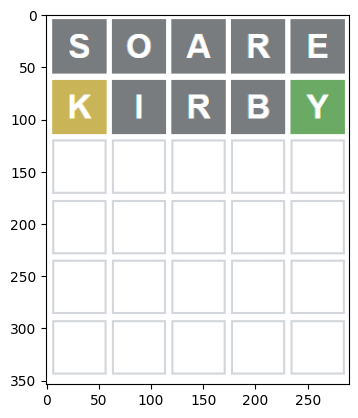

In [88]:
show_img(game_grid)


In [98]:
gray = cv2.cvtColor(game_grid, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Find the contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
for cn in contours:
    area = cv2.contourArea(cn)
    print(area)
    image_contours = cv2.drawContours(game_grid, cn, -1, (255, 0, 0), 3)

    show_img(image_contours)


In [ ]:
show_img(thresh)


In [127]:
def show_color(img):

    R, G, B = img[10:11, 10:11, :].ravel()

    if R < 130 and G < 130 and B < 130:
        return 0

    if R < 100 and G > 150 and B > 180:
        return 1

    if R < 120 and G > 120 and B < 120:
        return 2

    else:
        return img[10:11, 10:11, :].ravel()


                coluna 1: 10:60  coluna 2: 60:120  coluna 3: 120:170 coluna 4: 180:220  coluna 4 230:
linha 1: 0:60 
linha 2: 60:120 
linha 3: 120:170
linha 4: 180:220
linha 5: 240:270
linha 6: 290:350


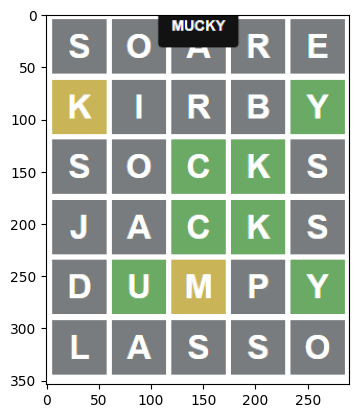

In [170]:
show_img(game_grid)


In [194]:
def get_code_from_line(full_grid, line):

    col1 = range(10, 60)
    col2 = range(60, 120)
    col3 = range(120, 170)
    col4 = range(180, 220)
    col5 = range(230, 289)

    cols = [col1, col2, col3, col4, col5]

    if line == 1:
        code = [show_color(full_grid[0:60, col, :]) for col in cols]
    if line == 2:
        code = [show_color(full_grid[60:120, col, :]) for col in cols]
    if line == 3:
        code = [show_color(full_grid[120:170, col, :]) for col in cols]
    if line == 4:
        code = [show_color(full_grid[180:220, col, :]) for col in cols]
    if line == 5:
        code = [show_color(full_grid[240:270, col, :]) for col in cols]
    if line == 6:
        code = [show_color(full_grid[290:350, col, :]) for col in cols]
    return ''.join(map(str, code))


In [197]:
get_code_from_line(game_grid, 3)

'00220'

In [198]:
import pyautogui

In [ ]:
time.sleep(2)
pyautogui.write("SOARE")